['耐心', '态度', '负责', '问诊', '看病', '认真负责', '服务态度', '回复', '详细', '挂号', '满意', '专业', '复诊', '希望', '检查', '解释', '就诊', '认真', '网上', '非常感谢', '治疗', '仔细', '及时', '效果', '着想']


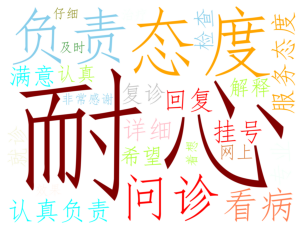

In [13]:
import os
import csv
import xlwt
import jieba
import jieba.analyse
from snownlp import SnowNLP
from wordcloud import WordCloud
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from stylecloud import gen_stylecloud

def eachfile(filepath):
    text_string=""
    files=os.listdir(filepath)
    for fi in files:
        with open('D:/所有医生评论/'+fi,'r',encoding='utf-8') as csvfile:
            reader = csv.DictReader(csvfile)
            comment_list = [row['患者评论'] for row in reader]
        for i in comment_list:
            s=SnowNLP(i)
            k=s.sentiments
            if k>0.5 and k<=0.8:
                text_string=text_string+i
    keywords = jieba.analyse.extract_tags(text_string,30)
    keywords.remove('医生')
    keywords.remove('病人')
    keywords.remove('患者')
    keywords.remove('大夫')
    keywords.remove('非常')
    print(keywords)
    a=' '.join(keywords)
    return a    

def main():
    wl = eachfile("D:\\所有医生评论")
    color_list=['#FFC0CB','#800080','#87CEEB','#00FFFF','#F5FFFA','#ADFF2F','#F5F5DC','#FAFAD2','#FFA500','#D2B48C',
               '#D2691E','#FF7F50','#FF0000','#800000','#C0C0C0','#FFF5EE','#808000','#228B22']
    colormap=colors.ListedColormap(color_list)
    #cloud_mask = np.array(Image.open("love.jpg"))
    wc = WordCloud(
        background_color = "white",
        #mask = cloud_mask,
        max_words = 100,
        font_path = 'simfang.ttf',
        height = 1200,
        width = 1600,
        max_font_size = 1000,
        random_state = 1000,
        colormap=colormap
        )
    myword = wc.generate(wl)
    plt.imshow(myword)
    plt.axis("off")
    plt.show()
    wc.to_file('1.jpg')

main()